In [14]:
def imdb(year,excel_file_name):   
    import requests
    from bs4 import BeautifulSoup
    import tqdm
    import matplotlib.pyplot as plt
    import pandas as pd
    x=0
    y=0
    names = []
    years = []
    imdb_ratings = []
    ms = []
    votes = []
    image_url=[]
#     for c in tqdm.tqdm(range(start_page,end_page+1)):
    url = f"https://www.imdb.com/search/title/?release_date={year}-01-01,{year}-12-31&sort=num_votes,desc&start=1&ref_=adv_nxt"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html5')
    movie_containers = soup.find_all('div', class_ = 'lister-item mode-advanced')
    for i in movie_containers:
        image_url.append(i.find('img', class_ = 'loadlate')['loadlate'])
        name = i.h3.a.text
        names.append(name)
        year = i.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
        imdb = float(i.strong.text)
        imdb_ratings.append(imdb)
        if i.find('div', class_ = 'ratings-metascore') is not None:
            m_score = i.find('span', class_ = 'metascore').text
            ms.append(int(m_score))
        else:
            ms.append(0)
        vote = i.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))
        x+=49
    x=0
    for j,k in tqdm.tqdm(zip(image_url,names)):
        try:
            resp = requests.get(j)
            with open(f'{k}.jpeg', 'wb') as fp:
                fp.write(resp.content)
#                 x+=1
        except Exception as e:
            pass
    for file_name in names:
        im = plt.imread(f'{file_name}.jpeg',"jpeg")
        plt.imshow(im)
        plt.xticks([])
        plt.yticks([])
        plt.show()
        print("  ",file_name)
    test_df = pd.DataFrame({'movie': names,
    'year': years,
    'imdb': imdb_ratings,
    'metascore': ms,
    'votes': votes
    })
    print(test_df.info())
    test_df.to_csv(f"{excel_file_name}.csv", index=False)
    return test_df
    


50it [00:13,  3.68it/s]


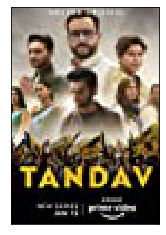

   Tandav


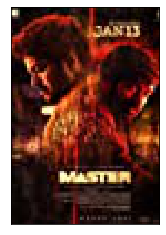

   Master


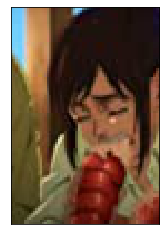

    Shingeki no kyojin


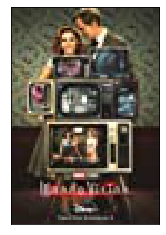

   WandaVision


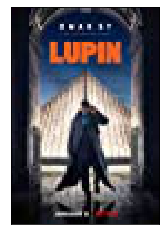

   Lupin


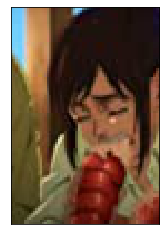

    Shingeki no kyojin


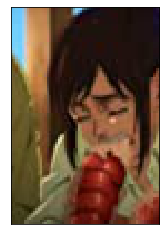

    Shingeki no kyojin


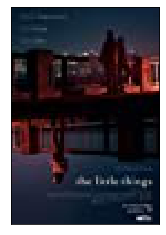

   The Little Things


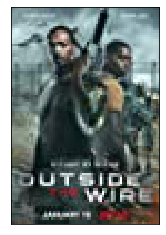

   Outside the Wire


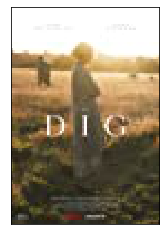

   The Dig


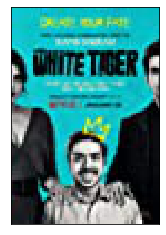

   The White Tiger


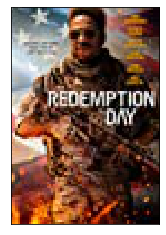

   Redemption Day


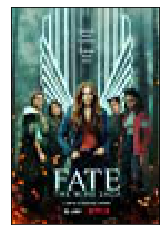

   Fate: The Winx Saga


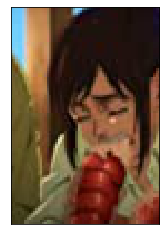

    Shingeki no kyojin


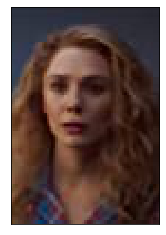

    WandaVision


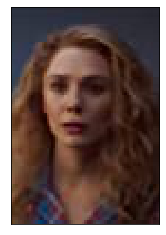

    WandaVision


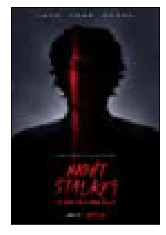

   Night Stalker: The Hunt for a Serial Killer


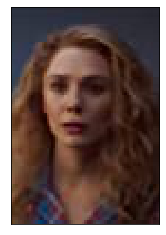

    WandaVision


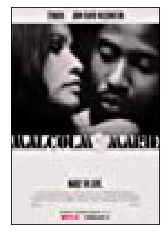

   Malcolm & Marie


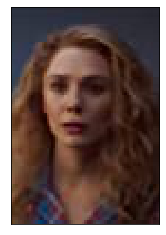

    WandaVision


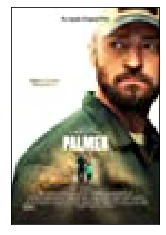

   Palmer


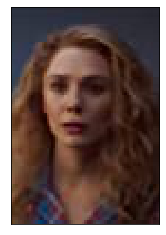

    WandaVision


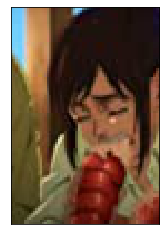

    Shingeki no kyojin


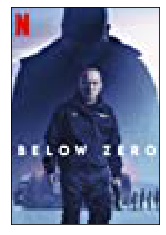

   Bajocero


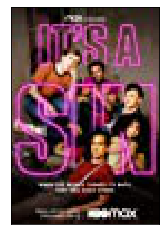

   It's a Sin


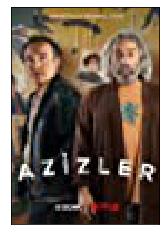

   Azizler


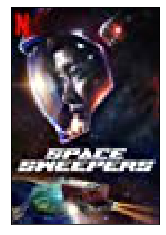

   Seungriho


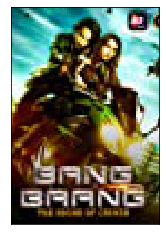

   Bang Baang


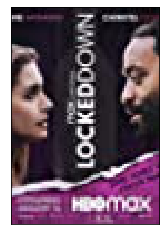

   Locked Down


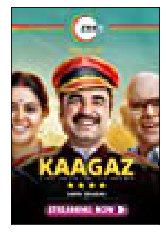

   Kaagaz


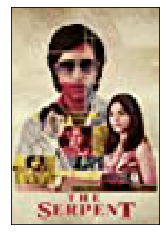

   The Serpent


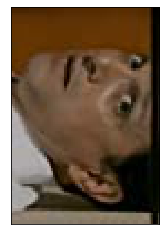

    Cobra Kai


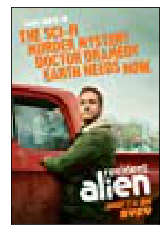

   Resident Alien


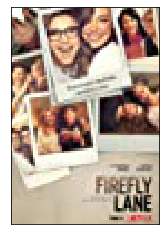

   Firefly Lane


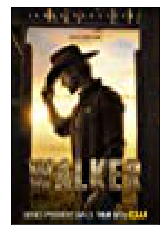

   Walker


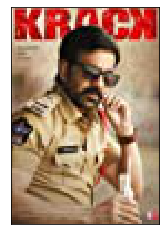

   Krack


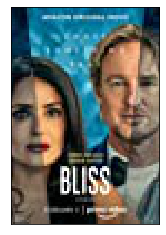

   Bliss


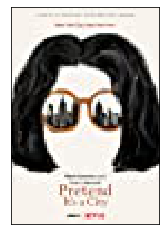

   Pretend It's a City


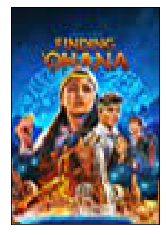

   Finding 'Ohana


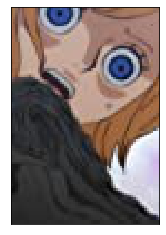

    One Piece: Wan pîsu


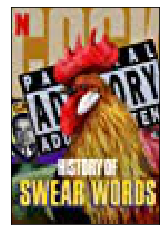

   History of Swear Words


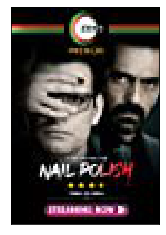

   Nail Polish


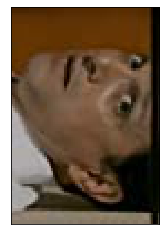

    Cobra Kai


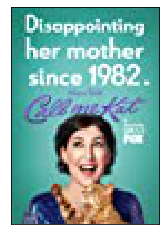

   Call Me Kat


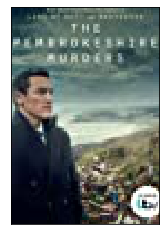

   The Pembrokeshire Murders


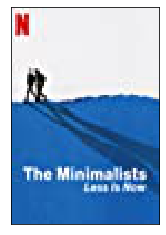

   The Minimalists: Less Is Now


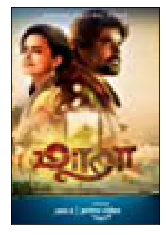

   Maara


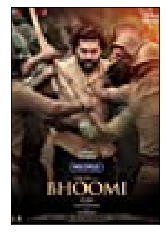

   Bhoomi


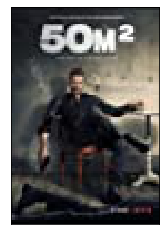

   50M2


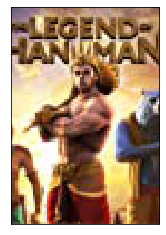

   The Legend of Hanuman
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      50 non-null     object 
 1   year       50 non-null     object 
 2   imdb       50 non-null     float64
 3   metascore  50 non-null     int64  
 4   votes      50 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ KB
None


,movie,year,imdb,metascore,votes
0,Tandav,(2021– ),4.2,0,52889
1,Master,(2021),7.2,0,48114
2,Shingeki no kyojin,(2013– ),10.0,0,42702
3,WandaVision,(2021),8.0,0,41833
4,Lupin,(2021– ),7.6,0,39093
5,Shingeki no kyojin,(2013– ),9.9,0,31692
6,Shingeki no kyojin,(2013– ),9.9,0,29966
7,The Little Things,(2021),6.3,54,27806
8,Outside the Wire,(2021),5.4,45,27092
9,The Dig,(2021),7.2,73,26210


In [16]:
imdb(2021,"2021")